<a href="https://colab.research.google.com/github/Shivanishibu04/LeXI-PGN-Summarizer/blob/main/Third_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab essentials
!pip install torch torchvision torchaudio --quiet
!pip install tqdm scikit-learn --quiet


In [ ]:
import torch
import random
import numpy as np

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)


Using device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
tr = pd.read_csv("train (1).csv")
ts = pd.read_csv("test (1).csv")
vl = pd.read_csv("val.csv")

In [ ]:
tr.info()
ts.info()
vl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122507 entries, 0 to 1122506
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Index   1122507 non-null  int64 
 1   Text    1122507 non-null  object
 2   Label   519448 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149881 entries, 0 to 149880
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Index   149881 non-null  int64 
 1   Text    149881 non-null  object
 2   Label   91381 non-null   object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293370 entries, 0 to 293369
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Index   293370 non-null  int64 
 1   Text    293370 non-null  object
 2   Label   171658 non-null  object
dtypes:

In [ ]:
tr.head(50)

,Index,Text,Label
0,0,"NAGESWARA RAO, J.",NaN
1,0,"For the sake of convenience, we are referring ...",Facts
2,0,Civil Appeal No. 1328 of 2021 By an order of a...,Issue
3,0,"On 23.03.2006, the Commissioner of IncomeTax (...",Issue
4,0,The Income Tax Appellate Tribunal (hereinafter...,Issue
5,0,The High Court refused to interfere with the T...,Issue
6,0,"Therefore, this Appeal by the Revenue.",Facts
7,0,This Appeal pertains to the assessment year 20...,Facts
8,0,The return was subsequently revised on 06.12.2...,Facts
9,0,"At the time of the assessment proceedings, the...",Facts


In [ ]:
label_counts = tr['Label'].value_counts()
print(label_counts)
for label, count in label_counts.items():
    print(f"{label:30s} : {count}")


Label
Reasoning                  202346
Facts                      169653
Arguments of Petitioner     64987
Arguments of Respondent     50097
Decision                    19574
Issue                       12791
Name: count, dtype: int64
Reasoning                      : 202346
Facts                          : 169653
Arguments of Petitioner        : 64987
Arguments of Respondent        : 50097
Decision                       : 19574
Issue                          : 12791


In [ ]:
# Fill missing labels with 'Other'
tr['Label'] = tr['Label'].fillna('Other')
vl['Label'] = vl['Label'].fillna('Other')
ts['Label'] = ts['Label'].fillna('Other')


In [ ]:
# Convert column names to lowercase
tr.columns = tr.columns.str.lower()
vl.columns = vl.columns.str.lower()
ts.columns = ts.columns.str.lower()


In [ ]:
label_counts = tr['label'].value_counts()

for label, count in label_counts.items():
    print(f"{label:30s} : {count}")


Other                          : 603059
Reasoning                      : 202346
Facts                          : 169653
Arguments of Petitioner        : 64987
Arguments of Respondent        : 50097
Decision                       : 19574
Issue                          : 12791


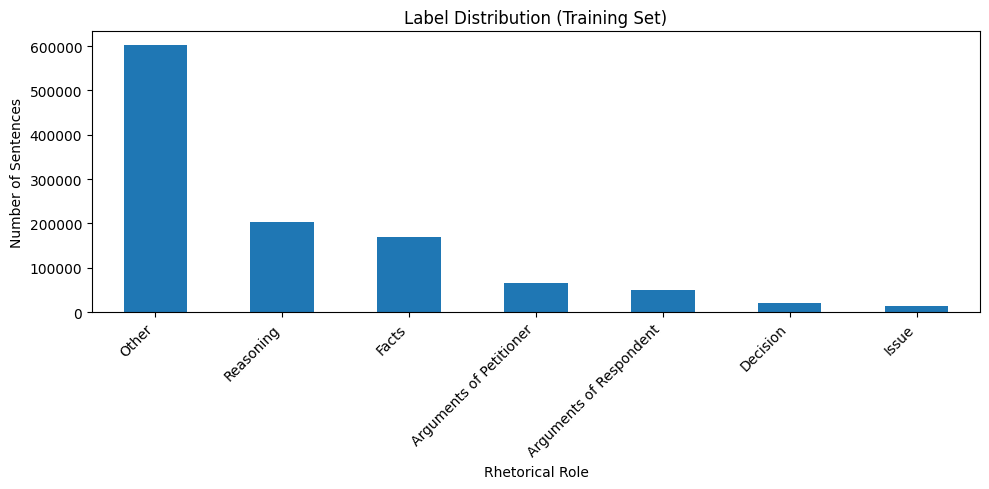

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.title('Label Distribution (Training Set)')
plt.xlabel('Rhetorical Role')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


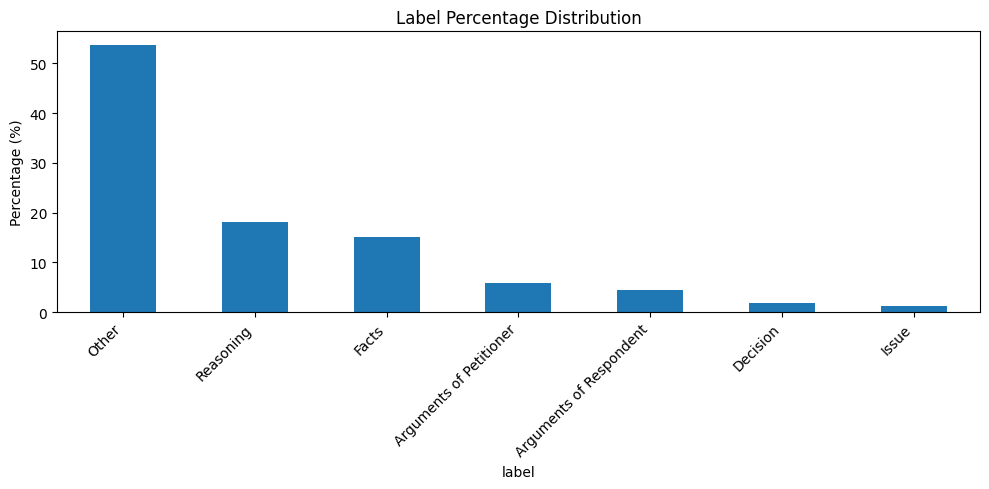

In [ ]:
label_percent = (label_counts / label_counts.sum()) * 100

plt.figure(figsize=(10, 5))
label_percent.plot(kind='bar')
plt.title('Label Percentage Distribution')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


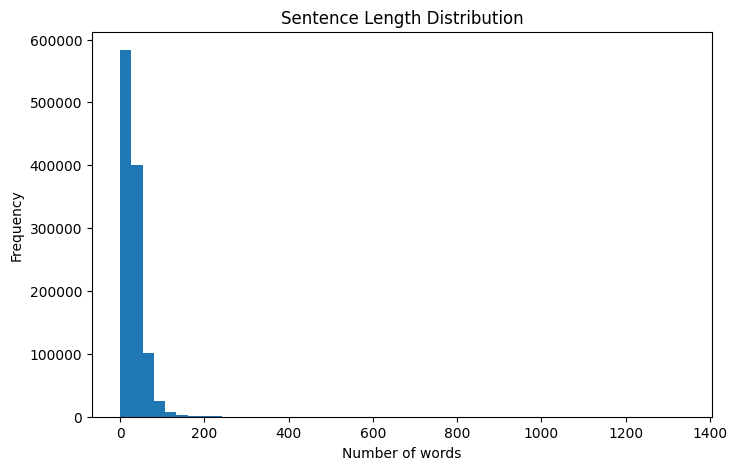

In [ ]:
tr['sent_len'] = tr['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
plt.hist(tr['sent_len'], bins=50)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()


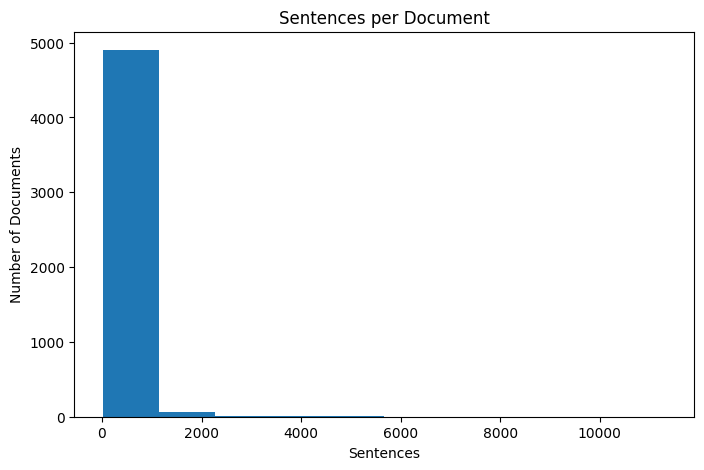

In [ ]:
doc_lengths = tr.groupby('index').size()

plt.figure(figsize=(8, 5))
plt.hist(doc_lengths, bins=10)
plt.title('Sentences per Document')
plt.xlabel('Sentences')
plt.ylabel('Number of Documents')
plt.show()


In [ ]:
def build_tag2idx(labels):
    tag2idx = {
        '<pad>': 0,
        '<start>': 1,
        '<end>': 2
    }
    for tag in sorted(labels):
        if tag not in tag2idx:
            tag2idx[tag] = len(tag2idx)
    return tag2idx

all_labels = set(tr['label'].unique())
tag2idx = build_tag2idx(all_labels)

tag2idx


{'<pad>': 0,
 '<start>': 1,
 '<end>': 2,
 'Arguments of Petitioner': 3,
 'Arguments of Respondent': 4,
 'Decision': 5,
 'Facts': 6,
 'Issue': 7,
 'Other': 8,
 'Reasoning': 9}

In [ ]:
def encode_labels(df, tag2idx):
    df['label_id'] = df['label'].map(tag2idx)
    return df

tr = encode_labels(tr, tag2idx)
vl = encode_labels(vl, tag2idx)
ts = encode_labels(ts, tag2idx)


In [ ]:
def group_by_document(df):
    docs = []
    labels = []

    for doc_id, group in df.groupby('index'):
        docs.append(group['text'].tolist())
        labels.append(group['label_id'].tolist())

    return docs, labels

train_docs, train_labels = group_by_document(tr)
val_docs, val_labels = group_by_document(vl)
test_docs, test_labels = group_by_document(ts)


In [ ]:
from collections import Counter

def build_vocab(docs, min_freq=2):
    counter = Counter()
    for doc in docs:
        for sent in doc:
            counter.update(sent.lower().split())

    word2idx = {'<pad>': 0, '<unk>': 1}
    for word, freq in counter.items():
        if freq >= min_freq:
            word2idx[word] = len(word2idx)

    return word2idx

word2idx = build_vocab(train_docs)


In [ ]:
def encode_documents(docs, word2idx):
    encoded_docs = []
    for doc in docs:
        encoded_doc = []
        for sent in doc:
            encoded_sent = [
                word2idx.get(w, word2idx['<unk>'])
                for w in sent.lower().split()
            ]
            encoded_doc.append(encoded_sent)
        encoded_docs.append(encoded_doc)
    return encoded_docs

X_train = encode_documents(train_docs, word2idx)
X_val   = encode_documents(val_docs, word2idx)
X_test  = encode_documents(test_docs, word2idx)


In [ ]:
from collections import Counter

flat_labels = [lbl for doc in train_labels for lbl in doc]
label_counts = Counter(flat_labels)

for tag, idx in tag2idx.items():
    if tag not in ['<pad>', '<start>', '<end>']:
        print(f"{tag:25s} : {label_counts.get(idx, 0)}")


Arguments of Petitioner   : 64987
Arguments of Respondent   : 50097
Decision                  : 19574
Facts                     : 169653
Issue                     : 12791
Other                     : 603059
Reasoning                 : 202346


In [ ]:
RARE_LABELS = [
    tag2idx['Issue'],
    tag2idx['Decision']
]

def has_rare_label(doc_labels):
    return any(lbl in RARE_LABELS for lbl in doc_labels)


In [ ]:
import random

def balance_documents(X, Y, keep_ratio=0.3, seed=42):
    random.seed(seed)

    rare_docs = []
    common_docs = []

    for x, y in zip(X, Y):
        if has_rare_label(y):
            rare_docs.append((x, y))
        else:
            common_docs.append((x, y))

    sampled_common = random.sample(
        common_docs,
        int(len(common_docs) * keep_ratio)
    )

    balanced = rare_docs + sampled_common
    random.shuffle(balanced)

    X_bal, Y_bal = zip(*balanced)
    return list(X_bal), list(Y_bal)


In [ ]:
X_train_bal, y_train_bal = balance_documents(
    X_train, train_labels, keep_ratio=0.35
)


In [ ]:
flat_bal = [lbl for doc in y_train_bal for lbl in doc]
Counter(flat_bal)


Counter({8: 602506,
         6: 169481,
         3: 64944,
         4: 50073,
         9: 202233,
         5: 19574,
         7: 12791})

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_sequence, pack_padded_sequence, pad_packed_sequence

SEED = 42

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

'''
    Sentences are represented as a sequence of word tokens. These sequences are converted into fixed-length sentence embeddings by passing them through a Bi-LSTM. The hidden embedding at the last word is considered to represent the entire sentence.
'''
class LSTM_Sentence_Encoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, drop = 0.5, device = 'cuda'): #cuda
        super().__init__()

        self.hidden_dim = hidden_dim

        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.lstm = nn.LSTM(emb_dim, hidden_dim // 2, bidirectional = True, batch_first = True)
        self.dropout = nn.Dropout(drop)
        self.hidden = None
        self.device = device

    def init_hidden(self, batch_size):
        return (torch.randn(2, batch_size, self.hidden_dim // 2).to(self.device), torch.randn(2, batch_size, self.hidden_dim // 2).to(self.device))

    def forward(self, sentences, sent_lengths):
        ## sentences: tensor[batch_size, max_sent_len]
        ## sent_lengths: list[batch_size]

        # initialize hidden state
        batch_size = sentences.shape[0]
        self.hidden = self.init_hidden(batch_size)

        # convert word tokens to word embeddings
        ## tensor[batch_size, max_sent_len] --> tensor[batch_size, max_sent_len, emb_dim]
        x = self.emb(sentences)
        x = self.dropout(x)

        # generate sentence embedding from sequence of word embeddings
        ## tensor[batch_size, max_sent_len, emb_dim] --> tensor[2, batch_size, hidden_dim // 2]
        x = nn.utils.rnn.pack_padded_sequence(x, list(sent_lengths), batch_first = True, enforce_sorted = False)
        _, (x, _) = self.lstm(x, self.hidden)

        ## tensor[2, batch_size, hidden_dim // 2] --> tensor[batch_size, hidden_dim]
        x = x.permute(1, 0, 2).contiguous().view(batch_size, -1)
        return x


'''
    A Bi-LSTM is used to generate feature vectors for each sentence from the sentence embeddings. The feature vectors are actually context-aware sentence embeddings. These are then fed to a feed-forward network to obtain emission scores for each class at each sentence.
'''
class LSTM_Emitter(nn.Module):
    def __init__(self, n_tags, emb_dim, hidden_dim, drop = 0.5, device = 'cuda'): #cuda
        super().__init__()

        self.hidden_dim = hidden_dim

        self.lstm = nn.LSTM(emb_dim, hidden_dim // 2, bidirectional = True, batch_first = True)
        self.dropout = nn.Dropout(drop)
        self.hidden2tag = nn.Linear(hidden_dim, n_tags)
        self.hidden = None
        self.device = device

    def init_hidden(self, batch_size):
        return (torch.randn(2, batch_size, self.hidden_dim // 2).to(self.device), torch.randn(2, batch_size, self.hidden_dim // 2).to(self.device))

    def forward(self, sequences):
        ## sequences: tensor[batch_size, max_seq_len, emb_dim]

        # initialize hidden state
        self.hidden = self.init_hidden(sequences.shape[0])

        # generate context-aware sentence embeddings (feature vectors)
        ## tensor[batch_size, max_seq_len, emb_dim] --> tensor[batch_size, max_seq_len, hidden_dim]
        x, self.hidden = self.lstm(sequences, self.hidden)
        x = self.dropout(x)

        # generate emission scores for each class at each sentence
        # tensor[batch_size, max_seq_len, hidden_dim] --> tensor[batch_size, max_seq_len, n_tags]
        x = self.hidden2tag(x)
        return x

'''
    A linear-chain CRF is fed with the emission scores at each sentence, and it finds out the optimal sequence of tags by learning the transition scores.
'''
class CRF(nn.Module):
    def __init__(self, n_tags, sos_tag_idx, eos_tag_idx, pad_tag_idx = None):
        super().__init__()

        self.n_tags = n_tags
        self.SOS_TAG_IDX = sos_tag_idx
        self.EOS_TAG_IDX = eos_tag_idx
        self.PAD_TAG_IDX = pad_tag_idx

        self.transitions = nn.Parameter(torch.empty(self.n_tags, self.n_tags))
        self.init_weights()

    def init_weights(self):
        # initialize transitions from random uniform distribution between -0.1 and 0.1
        nn.init.uniform_(self.transitions, -0.1, 0.1)

        # enforce constraints (rows = from, cols = to) with a big negative number.
        # exp(-1000000) ~ 0

        # no transitions to SOS
        self.transitions.data[:, self.SOS_TAG_IDX] = -1000000.0
        # no transition from EOS
        self.transitions.data[self.EOS_TAG_IDX, :] = -1000000.0

        if self.PAD_TAG_IDX is not None:
            # no transitions from pad except to pad
            self.transitions.data[self.PAD_TAG_IDX, :] = -1000000.0
            self.transitions.data[:, self.PAD_TAG_IDX] = -1000000.0
            # transitions allowed from end and pad to pad
            self.transitions.data[self.PAD_TAG_IDX, self.EOS_TAG_IDX] = 0.0
            self.transitions.data[self.PAD_TAG_IDX, self.PAD_TAG_IDX] = 0.0

    def forward(self, emissions, tags, mask = None):
        ## emissions: tensor[batch_size, seq_len, n_tags]
        ## tags: tensor[batch_size, seq_len]
        ## mask: tensor[batch_size, seq_len], indicates valid positions (0 for pad)
        return -self.log_likelihood(emissions, tags, mask = mask)

    def log_likelihood(self, emissions, tags, mask = None):
        if mask is None:
            mask = torch.ones(emissions.shape[:2])

        scores = self._compute_scores(emissions, tags, mask = mask)
        partition = self._compute_log_partition(emissions, mask = mask)
        return torch.sum(scores - partition)

    # find out the optimal tag sequence using Viterbi Decoding Algorithm
    def decode(self, emissions, mask = None):
        if mask is None:
            mask = torch.ones(emissions.shape[:2])

        scores, sequences = self._viterbi_decode(emissions, mask)
        return scores, sequences

    def _compute_scores(self, emissions, tags, mask):
        batch_size, seq_len = tags.shape
        scores = torch.zeros(batch_size).cuda()

        # save first and last tags for later
        first_tags = tags[:, 0]
        last_valid_idx = mask.int().sum(1) - 1
        last_tags = tags.gather(1, last_valid_idx.unsqueeze(1)).squeeze()

        # add transition from SOS to first tags for each sample in batch
        t_scores = self.transitions[self.SOS_TAG_IDX, first_tags]

        # add emission scores of the first tag for each sample in batch
        e_scores = emissions[:, 0].gather(1, first_tags.unsqueeze(1)).squeeze()
        scores += e_scores + t_scores

        # repeat for every remaining word
        for i in range(1, seq_len):

            is_valid = mask[:, i]
            prev_tags = tags[:, i - 1]
            curr_tags = tags[:, i]

            e_scores = emissions[:, i].gather(1, curr_tags.unsqueeze(1)).squeeze()
            t_scores = self.transitions[prev_tags, curr_tags]

            # apply the mask
            e_scores = e_scores * is_valid
            t_scores = t_scores * is_valid

            scores += e_scores + t_scores

        # add transition from last tag to EOS for each sample in batch
        scores += self.transitions[last_tags, self.EOS_TAG_IDX]
        return scores

    # compute the partition function in log-space using forward algorithm
    def _compute_log_partition(self, emissions, mask):
        batch_size, seq_len, n_tags = emissions.shape

        # in the first step, SOS has all the scores
        alphas = self.transitions[self.SOS_TAG_IDX, :].unsqueeze(0) + emissions[:, 0]

        for i in range(1, seq_len):
            ## tensor[batch_size, n_tags] -> tensor[batch_size, 1, n_tags]
            e_scores = emissions[:, i].unsqueeze(1)

            ## tensor[n_tags, n_tags] -> tensor[batch_size, n_tags, n_tags]
            t_scores = self.transitions.unsqueeze(0)

            ## tensor[batch_size, n_tags] -> tensor[batch_size, n_tags, 1]
            a_scores = alphas.unsqueeze(2)

            scores = e_scores + t_scores + a_scores
            new_alphas = torch.logsumexp(scores, dim = 1)

            # set alphas if the mask is valid, else keep current values
            is_valid = mask[:, i].unsqueeze(-1)
            alphas = is_valid * new_alphas + (1 - is_valid) * alphas

        # add scores for final transition
        last_transition = self.transitions[:, self.EOS_TAG_IDX]
        end_scores = alphas + last_transition.unsqueeze(0)

        # return log_sum_exp
        return torch.logsumexp(end_scores, dim = 1)

    # return a list of optimal tag sequence for each example in the batch
    def _viterbi_decode(self, emissions, mask):
        batch_size, seq_len, n_tags = emissions.shape

        # in the first iteration, SOS will have all the scores and then, the max
        alphas = self.transitions[self.SOS_TAG_IDX, :].unsqueeze(0) + emissions[:, 0]

        backpointers = []

        for i in range(1, seq_len):
            ## tensor[batch_size, n_tags] -> tensor[batch_size, 1, n_tags]
            e_scores = emissions[:, i].unsqueeze(1)

            ## tensor[n_tags, n_tags] -> tensor[batch_size, n_tags, n_tags]
            t_scores = self.transitions.unsqueeze(0)

            ## tensor[batch_size, n_tags] -> tensor[batch_size, n_tags, 1]
            a_scores = alphas.unsqueeze(2)

            scores = e_scores + t_scores + a_scores

            # find the highest score and tag, instead of log_sum_exp
            max_scores, max_score_tags = torch.max(scores, dim = 1)

            # set alphas if the mask is valid, otherwise keep the current values
            is_valid = mask[:, i].unsqueeze(-1)
            alphas = is_valid * max_scores + (1 - is_valid) * alphas

            backpointers.append(max_score_tags.t())

        # add scores for final transition
        last_transition = self.transitions[:, self.EOS_TAG_IDX]
        end_scores = alphas + last_transition.unsqueeze(0)

        # get the final most probable score and the final most probable tag
        max_final_scores, max_final_tags = torch.max(end_scores, dim=1)

        # find the best sequence of labels for each sample in the batch
        best_sequences = []
        emission_lengths = mask.int().sum(dim=1)
        for i in range(batch_size):

            # recover the original sentence length for the i-th sample in the batch
            sample_length = emission_lengths[i].item()

            # recover the max tag for the last timestep
            sample_final_tag = max_final_tags[i].item()

            # limit the backpointers until the last but one
            # since the last corresponds to the sample_final_tag
            sample_backpointers = backpointers[: sample_length - 1]

            # follow the backpointers to build the sequence of labels
            sample_path = self._find_best_path(i, sample_final_tag, sample_backpointers)

            # add this path to the list of best sequences
            best_sequences.append(sample_path)

        return max_final_scores, best_sequences

    # auxiliary function to find the best path sequence for a specific example
    def _find_best_path(self, sample_id, best_tag, backpointers):
        ## backpointers: list[tensor[seq_len_i - 1, n_tags, batch_size]], seq_len_i is the length of the i-th sample of the batch

        # add the final best_tag to our best path
        best_path = [best_tag]

        # traverse the backpointers in backwards
        for backpointers_t in reversed(backpointers):

            # recover the best_tag at this timestep
            best_tag = backpointers_t[best_tag][sample_id].item()

            # append to the beginning of the list so we don't need to reverse it later
            best_path.insert(0, best_tag)

        return best_path

In [ ]:
class Hier_LSTM_CRF_Classifier(nn.Module):
    def __init__(self, n_tags, sent_emb_dim, sos_tag_idx, eos_tag_idx, pad_tag_idx, vocab_size = 0, word_emb_dim = 0, pad_word_idx = 0, pretrained = False, device = 'cuda'): #cuda
        super().__init__()

        self.emb_dim = sent_emb_dim
        self.pretrained = pretrained
        self.device = device
        self.pad_tag_idx = pad_tag_idx
        self.pad_word_idx = pad_word_idx

        # sentence encoder is not required for pretrained embeddings
        self.sent_encoder = LSTM_Sentence_Encoder(vocab_size, word_emb_dim, sent_emb_dim).to(self.device) if not self.pretrained else None

        self.emitter = LSTM_Emitter(n_tags, sent_emb_dim, sent_emb_dim).to(self.device)
        self.crf = CRF(n_tags, sos_tag_idx, eos_tag_idx, pad_tag_idx).to(self.device)


    def forward(self, x):
        batch_size = len(x)
        seq_lengths = [len(doc) for doc in x]
        max_seq_len = max(seq_lengths)

        if not self.pretrained: ## x: list[batch_size, sents_per_doc, words_per_sent]
            tensor_x = []
            for doc in x:
                sents = [torch.tensor(s, dtype = torch.long) for s in doc]
                sent_lengths = [len(s) for s in doc]

                ## list[sents_per_doc, words_per_sent] --> tensor[sents_per_doc, max_sent_len]
                sents = nn.utils.rnn.pad_sequence(sents, batch_first = True, padding_value = self.pad_word_idx).to(self.device)

                ## tensor[sents_per_doc, max_sent_len] --> tensor[sents_per_doc, sent_emb_dim]
                sents = self.sent_encoder(sents, sent_lengths)

                tensor_x.append(sents)

        else: ## x: list[batch_size, sents_per_doc, sent_emb_dim]
            tensor_x = [torch.tensor(doc, dtype = torch.float, requires_grad = True) for doc in x]

        ## list[batch_size, sents_per_doc, sent_emb_dim] --> tensor[batch_size, max_seq_len, sent_emb_dim]
        tensor_x = nn.utils.rnn.pad_sequence(tensor_x, batch_first = True).to(self.device)

        self.mask = torch.zeros(batch_size, max_seq_len).to(self.device)
        for i, sl in enumerate(seq_lengths):
            self.mask[i, :sl] = 1

        self.emissions = self.emitter(tensor_x)
        _, path = self.crf.decode(self.emissions, mask = self.mask)
        return path

    def _loss(self, y):
        ##  list[batch_size, sents_per_doc] --> tensor[batch_size, max_seq_len]
        tensor_y = [torch.tensor(doc, dtype = torch.long) for doc in y]
        tensor_y = nn.utils.rnn.pad_sequence(tensor_y, batch_first = True, padding_value = self.pad_tag_idx).to(self.device)

        nll = self.crf(self.emissions, tensor_y, mask = self.mask)
        return nll

In [58]:
import torch
import time
from tqdm import tqdm
import json
import random
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

'''
    Randomly shuffle the data and divide into batches
'''
def batchify(x, y, batch_size):
    idx = list(range(len(x)))
    random.shuffle(idx)

    # convert to numpy array for ease of indexing
    x = np.array(x, dtype=object)[idx]
    y = np.array(y, dtype=object)[idx]

    i = 0
    while i < len(x):
        j = min(i + batch_size, len(x))

        batch_idx = idx[i : j]
        batch_x = x[i : j]
        batch_y = y[i : j]

        yield batch_idx, batch_x, batch_y

        i = j


'''
    Perform a single training step by iterating over the entire training data once. Data is divided into batches.
'''
def train_step(model, opt, x, y, batch_size):
    ## x: list[num_examples, sents_per_example, features_per_sentence]
    ## y: list[num_examples, sents_per_example]

    model.train()

    total_loss = 0
    y_pred = [] # predictions
    y_gold = [] # gold standard
    idx = [] # example index
    total_batches = len(x) / batch_size + (1 if len(x) % batch_size != 0 else 0)
    for i, (batch_idx, batch_x, batch_y) in enumerate(tqdm(batchify(x, y, batch_size), total=total_batches)):
        pred = model(batch_x)
        loss = model._loss(batch_y)

        opt.zero_grad()
        loss.backward()
        opt.step()

        total_loss += loss.item()

        y_pred.extend(pred)
        y_gold.extend(batch_y)
        idx.extend(batch_idx)

    assert len(sum(y, [])) == len(sum(y_pred, [])), "Mismatch in predicted"

    return total_loss / (i + 1), idx, y_gold, y_pred

'''
    Perform a single evaluation step by iterating over the entire training data once. Data is divided into batches.
'''
def val_step(model, x, y, batch_size):
    ## x: list[num_examples, sents_per_example, features_per_sentence]
    ## y: list[num_examples, sents_per_example]

    model.train()

    total_loss = 0
    y_pred = [] # predictions
    y_gold = [] # gold standard
    idx = [] # example index

    for i, (batch_idx, batch_x, batch_y) in enumerate(batchify(x, y, batch_size)):
        pred = model(batch_x)
        loss = model._loss(batch_y)

        total_loss += loss.item()

        y_pred.extend(pred)
        y_gold.extend(batch_y)
        idx.extend(batch_idx)

    assert len(sum(y, [])) == len(sum(y_pred, [])), "Mismatch in predicted"

    return total_loss / (i + 1), idx, y_gold, y_pred

'''
    Infer predictions for un-annotated data
'''
def infer_step(model, x, batch_size=64):
    model.eval()
    predictions = []
    with torch.no_grad():
        for i in range(0, len(x), batch_size):
            batch_x = x[i:i+batch_size]
            batch_pred = model(batch_x)
            predictions.extend(batch_pred)
    return predictions


'''
    Report all metrics in format using sklearn.metrics.classification_report
'''
def statistics(data_state, tag2idx):
    idx, gold, pred = data_state['idx'], data_state['gold'], data_state['pred']

    rev_tag2idx = {v: k for k, v in tag2idx.items()}
    tags = [rev_tag2idx[i] for i in range(len(tag2idx)) if rev_tag2idx[i] not in ['<start>', '<end>', '<pad>']]

    # flatten out
    gold = sum(gold, [])
    pred = sum(pred, [])

    print(classification_report(gold, pred, target_names = tags, digits = 3))

'''
    Train the model on entire dataset and report loss and macro-F1 after each epoch.
'''
def learn(model, x, y, tag2idx, val_fold, args):
    samples_per_fold = args.dataset_size // args.num_folds

    val_idx = list(range(val_fold * samples_per_fold, val_fold * samples_per_fold + samples_per_fold))
    train_idx = list(range(val_fold * samples_per_fold)) + list(range(val_fold * samples_per_fold + samples_per_fold, args.dataset_size))

    train_x = [x[i] for i in train_idx]
    train_y = [y[i] for i in train_idx]

    val_x = [x[i] for i in val_idx]
    val_y = [y[i] for i in val_idx]

    opt = torch.optim.Adam(model.parameters(), lr = args.lr, weight_decay = args.reg)

    print("{0:>7}  {1:>10}  {2:>6}  {3:>10}  {4:>6}".format('EPOCH', 'Tr_LOSS', 'Tr_F1', 'Val_LOSS', 'Val_F1'))
    print("-----------------------------------------------------------")

    best_val_f1 = 0.0

    model_state = {}
    data_state = {}

    start_time = time.time()

    for epoch in range(1, args.epochs + 1):

        train_loss, train_idx, train_gold, train_pred = train_step(model, opt, train_x, train_y, args.batch_size)
        val_loss, val_idx, val_gold, val_pred = val_step(model, val_x, val_y, args.batch_size)

        train_f1 = f1_score(sum(train_gold, []), sum(train_pred, []), average = 'macro')
        val_f1 = f1_score(sum(val_gold, []), sum(val_pred, []), average = 'macro')

        if epoch % args.print_every == 0:
            print("{0:7d}  {1:10.3f}  {2:6.3f}  {3:10.3f}  {4:6.3f}".format(epoch, train_loss, train_f1, val_loss, val_f1))

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            model_state = {'epoch': epoch, 'arch': model, 'name': model.__class__.__name__, 'state_dict': model.state_dict(), 'best_f1': val_f1, 'optimizer' : opt.state_dict()}
            data_state = {'idx': val_idx, 'loss': val_loss, 'gold': val_gold, 'pred': val_pred}

    end_time = time.time()

    print("Dumping model and data ...", end = ' ')

    torch.save(model_state, args.save_path + 'model_state' + str(val_fold) + '.tar')

    with open(args.save_path + 'data_state' + str(val_fold) + '.json', 'w') as fp:
        json.dump(data_state, fp)

    print("Done")

    print('Time taken:', int(end_time - start_time), 'secs')

    statistics(data_state, tag2idx)

In [62]:
import string
from collections import defaultdict

'''
    This function constructs folds that have a balanced category distribution.
    Folds are stacked up together to give the order of docs in the main data.

    idx_order defines the order of documents in the data. Each sequence of (docs_per_fold) documents in idx_order can be treated as a single fold, containing documents balanced across each category.
'''
def prepare_folds(args):
    with open(args.cat_path) as fp:

        categories = []
        for line in fp:
            _, docs = line.strip().split('\t')
            docs = docs.strip().split(' ')
            categories.append(docs)

    # categories: list[category, docs_per_category]

    categories.sort(key = lambda x: len(x))
    n_docs = len(sum(categories, []))
    assert n_docs == args.dataset_size, "invalid category list"

    docs_per_fold = args.dataset_size // args.num_folds
    folds = [[] for f in range(docs_per_fold)]

    # folds: list[num_folds, docs_per_fold]

    f = 0
    for cat in categories:
        for doc in cat:
            folds[f].append(doc)
            f = (f + 1) % 5

    # list[num_folds, docs_per_fold] --> list[num_folds * docs_per_fold]
    idx_order = sum(folds, [])
    return idx_order

'''
    This file prepares the numericalized data in the form of lists, to be used in training mode.
    idx_order is the order of documents in the dataset.

        x:  list[num_docs, sentences_per_doc, words_per_sentence]       if pretrained = False
            list[num_docs, sentences_per_doc, sentence_embedding_dim]   if pretrained = True
        y:  list[num_docs, sentences_per_doc]
'''
def prepare_data(idx_order, args):
    x, y = [], []

    word2idx = defaultdict(lambda: len(word2idx))
    tag2idx = defaultdict(lambda: len(tag2idx))

    # map the special symbols first
    word2idx['<pad>'], word2idx['<unk>'] = 0, 1
    tag2idx['<pad>'], tag2idx['<start>'], tag2idx['<end>'] = 0, 1, 2

    # iterate over documents
    for doc in idx_order:
        doc_x, doc_y = [], []

        with open(args.data_path + doc + '.txt') as fp:

            # iterate over sentences
            for sent in fp:
                try:
                	sent_x, sent_y = sent.strip().split('\t')
                except ValueError:
                	continue

                # cleanse text, map words and tags
                if not args.pretrained:
                    sent_x = sent_x.strip().lower().translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
                    sent_x = list(map(lambda x: word2idx[x], sent_x.split()))
                else:
                    sent_x = list(map(float, sent_x.strip().split()[:args.emb_dim]))
                sent_y = tag2idx[sent_y.strip()]

                if sent_x != []:
                    doc_x.append(sent_x)
                    doc_y.append(sent_y)

        x.append(doc_x)
        y.append(doc_y)

    return x, y, word2idx, tag2idx

'''
    This file prepares the numericalized data in the form of lists, to be used in inference mode.
    idx_order is the order of documents in the dataset.

        x:  list[num_docs, sentences_per_doc, words_per_sentence]       if pretrained = False
            list[num_docs, sentences_per_doc, sentence_embedding_dim]   if pretrained = True
'''
def prepare_data_inference(idx_order, args, sent2vec_model):
    x = []

    # iterate over documents
    for doc in idx_order:
        doc_x = []

        with open(args.data_path + doc + '.txt') as fp:

            # iterate over sentences
            for sent in fp:
                sent_x = sent.strip()

                # cleanse text, map words and tags
                if not args.pretrained:
                    sent_x = sent_x.lower().translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
                    sent_x = list(map(lambda x: args.word2idx[x] if x in args.word2idx else args.word2idx['<unk>'], sent_x.split()))
                else:
                    sent_x = sent2vec_model.embed_sentence(sent_x).flatten().tolist()[:args.emb_dim]

                if sent_x != []:
                    doc_x.append(sent_x)

        x.append(doc_x)

    return x


In [1]:
import argparse
import json
import random # Needed for random.shuffle in batchify and balance_documents
import numpy as np # Needed for numpy array operations

# Placeholder functions for prepare_folds and prepare_data
def prepare_folds(args):
    # Access global balanced data. This function assumes X_train_bal is already computed.
    global X_train_bal

    # Ensure dataset_size is correct based on the balanced data
    if args.dataset_size != len(X_train_bal):
        print(f"Warning: Overriding dataset_size from {args.dataset_size} to {len(X_train_bal)} based on balanced training data.")
        args.dataset_size = len(X_train_bal)

    # For cross-validation, we just need an ordered list of indices.
    # The actual shuffling and splitting will be handled by the learn function.
    return list(range(args.dataset_size))

def prepare_data(idx_order, args):
    # Access global balanced data and dictionaries
    global X_train_bal, y_train_bal, word2idx, tag2idx

    # Select documents based on idx_order, if necessary.
    # Here, we assume idx_order represents the full set of indices
    # for the balanced training data that will be passed to `learn`.
    x_full_original = [X_train_bal[i] for i in idx_order]
    y_full_original = [y_train_bal[i] for i in idx_order]

    x_filtered = []
    y_filtered = []

    for doc_x, doc_y in zip(x_full_original, y_full_original):
        filtered_doc_x = []
        filtered_doc_y = []
        for sent_x, sent_y in zip(doc_x, doc_y):
            if len(sent_x) > 0: # Only include sentences with length > 0
                filtered_doc_x.append(sent_x)
                filtered_doc_y.append(sent_y)

        # Only append documents that still contain sentences after filtering
        if len(filtered_doc_x) > 0:
            x_filtered.append(filtered_doc_x)
            y_filtered.append(filtered_doc_y)

    return x_filtered, y_filtered, word2idx, tag2idx

def main():
    parser = argparse.ArgumentParser()

    parser.add_argument('--pretrained', default = False, type = bool, help = 'Whether the model uses pretrained sentence embeddings or not')
    parser.add_argument('--data_path', default = '../../data/Hier_BiLSTM_CRF/train/', type = str, help = 'Folder to store the annotated text files')
    parser.add_argument('--save_path', default = '../', type = str, help = 'Folder where predictions and models will be saved')
    parser.add_argument('--cat_path', default = 'categories.txt', type = str, help = 'Path to file containing category details')
    parser.add_argument('--dataset_size', default = 6408, type = int, help = 'Total no. of docs')
    parser.add_argument('--num_folds', default = 5, type = int, help = 'No. of folds to divide the dataset into')
    parser.add_argument('--device', default = 'cuda', type = str, help = 'cuda / cpu')

    parser.add_argument('--batch_size', default = 8, type = int)
    parser.add_argument('--print_every', default = 10, type = int, help = 'Epoch interval after which validation macro f1 and loss will be printed')
    parser.add_argument('--lr', default = 0.01, type = float, help = 'Learning Rate')
    parser.add_argument('--reg', default = 0, type = float, help = 'L2 Regularization')
    parser.add_argument('--emb_dim', default = 200, type = int, help = 'Sentence embedding dimension')
    parser.add_argument('--word_emb_dim', default = 100, type = int, help = 'Word embedding dimension, applicable only if pretrained = False')
    parser.add_argument('--epochs', default = 5, type = int)

    parser.add_argument('--val_fold', default = 'cross', type = str, help = 'Fold number to be used as validation, use cross for num_folds cross validation')
    args = parser.parse_args([]) # Pass an empty list to parse_args()

    print('\nPreparing data ...', end = ' ')
    idx_order = prepare_folds(args)
    x, y, word2idx, tag2idx = prepare_data(idx_order, args)
    print('Done')

    print('Vocabulary size:', len(word2idx))
    print('#Tags:', len(tag2idx))

    # Dump word2idx and tag2idx
    with open(args.save_path + 'word2idx.json', 'w') as fp:
        json.dump(word2idx, fp)
    with open(args.save_path + 'tag2idx.json', 'w') as fp:
        json.dump(tag2idx, fp)

    if args.val_fold == 'cross':
        print('\nCross-validation\n')
        for f in range(args.num_folds):

            print('\nInitializing model ...', end = ' ')
            model = Hier_LSTM_CRF_Classifier(len(tag2idx), args.emb_dim, tag2idx['<start>'], tag2idx['<end>'], tag2idx['<pad>'], vocab_size = len(word2idx), word_emb_dim = args.word_emb_dim, pretrained = args.pretrained, device = args.device).to(args.device)
            print('Done')

            print('\nEvaluating on fold', f, '...')
            learn(model, x, y, tag2idx, f, args)

    else:

        print('\nInitializing model ...', end = ' ')
        model = Hier_LSTM_CRF_Classifier(len(tag2idx), args.emb_dim, tag2idx['<start>'], tag2idx['<end>'], tag2idx['<pad>'], vocab_size = len(word2idx), word_emb_dim = args.word_emb_dim, pretrained = args.pretrained, device = args.device).to(args.device)
        print('Done')

        print('\nEvaluating on fold', args.val_fold, '...')
        learn(model, x, y, tag2idx, int(args.val_fold), args)


if __name__ == '__main__':
    main()


Preparing data ... 

NameError: name 'X_train_bal' is not defined